# Email Spam Classification

In this notebook, we will:
1. Load and preprocess the dataset.
2. Transform the text data using TF-IDF vectorization.
3. Train and evaluate different machine learning models (Naive Bayes, SVM, and Neural Network).
4. Visualize the results.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


## Load Dataset

In [4]:
# Load the dataset
data = pd.read_csv('combined_data.csv')
data = data.where((pd.notnull(data)), '')
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [5]:
label_counts = data['label'].value_counts()
print(f"Number of rows with label 0: {label_counts[0]}")
print(f"Number of rows with label 1: {label_counts[1]}")

Number of rows with label 0: 39538
Number of rows with label 1: 43910


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


## Preprocess Dataset

* 1 - Spam
* 0 - Ham

In [7]:
data.loc[data['label'] == '1', 'label',] = 1
data.loc[data['label'] == '0', 'label',] = 0
data['text'] = data['text'].apply(lambda x : x.replace('\n\r', ' '))
X = data['text']
Y = data['label']

* We split X and Y into training and testing datasets.
* We chose a smaller percentage for the test set due to the initially large dataset.
* We are not setting a random state for now to test different outcomes.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Vectorize


In [9]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words = 'english', lowercase=True)

X_train = feature_extraction.fit_transform(X_train)
X_test = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

## Train and Evaluate Models
-------------------
### Naive Bias

* Traning the model with dataset for training


In [10]:
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [11]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

In [12]:
prediction_train = nb_model.predict(X_train)
accuracy_train = accuracy_score(Y_train, prediction_train)
precision_train = precision_score(Y_train, prediction_train)
recall_train = recall_score(Y_train, prediction_train)
f1_train = f1_score(Y_train, prediction_train)
train_metrics = [accuracy_train, precision_train, recall_train, f1_train]

print(f"Accuracy on training data: " + str(accuracy_train))

Accuracy on training data: 0.9828901641745337


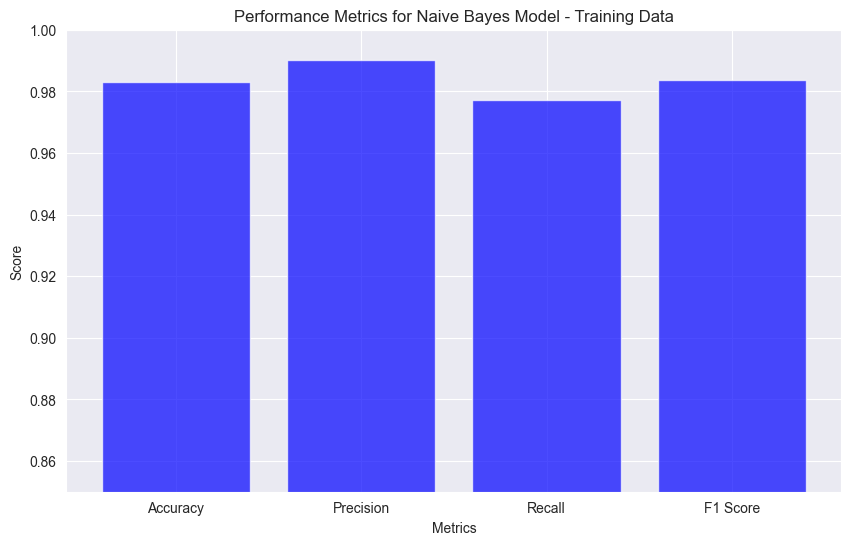

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(metrics, train_metrics, color='b', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Model - Training Data')
plt.ylim(0.85, 1)
plt.show()

In [14]:
prediction_test = nb_model.predict(X_test)
accuracy_test = accuracy_score(Y_test, prediction_test)
precision_test = precision_score(Y_test, prediction_test)
recall_test = recall_score(Y_test, prediction_test)
f1_test = f1_score(Y_test, prediction_test)
test_metrics = [accuracy_test, precision_test, recall_test, f1_test]

print(f"Accuracy on test data: " + str(accuracy_test))


Accuracy on test data: 0.9726782504493708


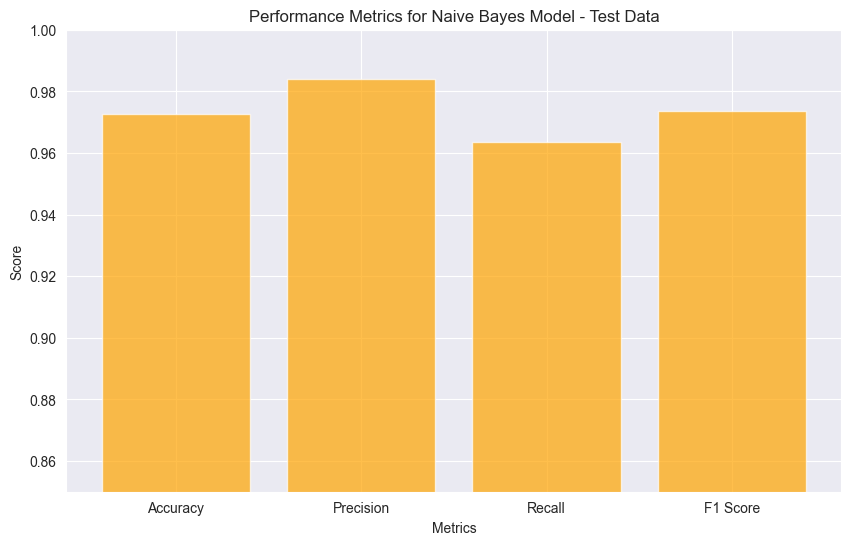

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(metrics, test_metrics, color='orange', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Model - Test Data')
plt.ylim(0.85, 1)
plt.show()

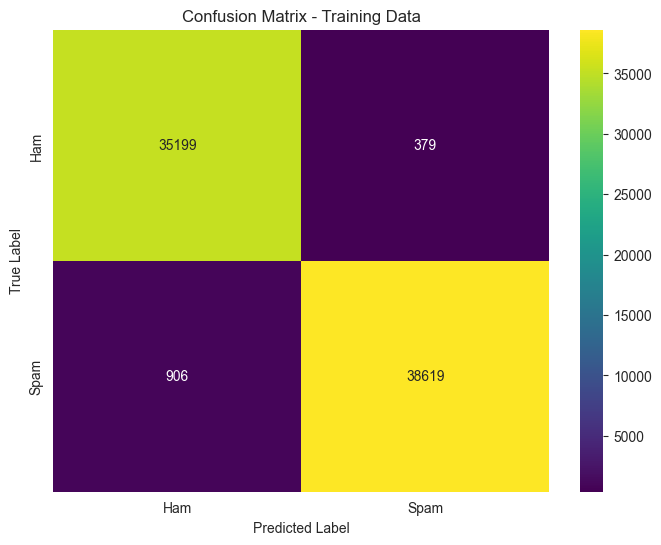

In [16]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(Y_train, prediction_train)
cm_test = confusion_matrix(Y_test, prediction_test)
labels = ["Ham", "Spam"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

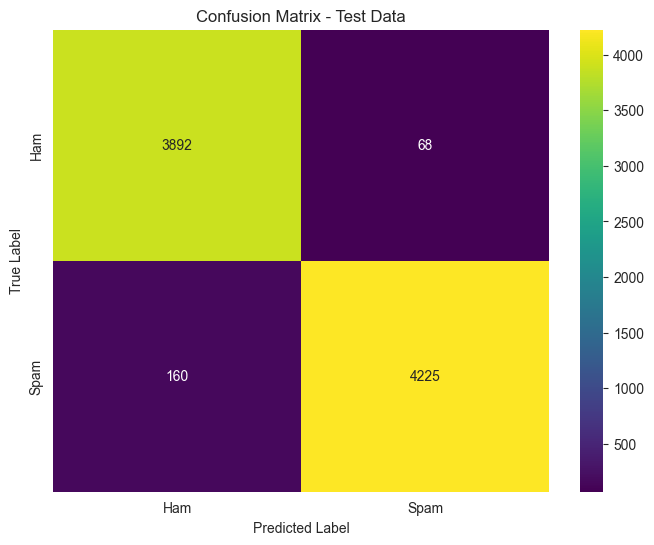

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

* Testing of single email examples.
* Examples were taken from a Gmail account.

In [18]:
input_email = ["The way you mentally approach a marathon is almost as important as your physical preparation, and will have a significant impact on both your time and your experience on the day."]
# input_email = ["I taught this technique to Harold, an 82-year-old man with terrible arthritis who had tried to learn piano for more than 50 years and was not going anywhere."]

transformed_email = feature_extraction.transform(input_email)
prediction_nb_input = nb_model.predict(transformed_email)
print(prediction_nb_input[0])
if prediction_nb_input[0] == 0: 
    print("Email is ham.")
else:
    print("Email is spam")

0
Email is ham.


## Tuning Model

* alpha hyperparameter and the fundamental tradeoff
* High alpha -> underfitting. We are adding large counts to everything and so we are diluting the signal in the data

    

* Low alpha -> overfitting

In [19]:
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
train_accuracies = []
test_accuracies = []
for alpha in alpha_values:
    nb_model = MultinomialNB(alpha=alpha)
    nb_model.fit(X_train, Y_train)
    prediction_train = nb_model.predict(X_train)
    accuracy_train = accuracy_score(Y_train, prediction_train)
    train_accuracies.append(accuracy_train)
    prediction_test = nb_model.predict(X_test)
    accuracy_test = accuracy_score(Y_test, prediction_test)
    test_accuracies.append(accuracy_test)
    


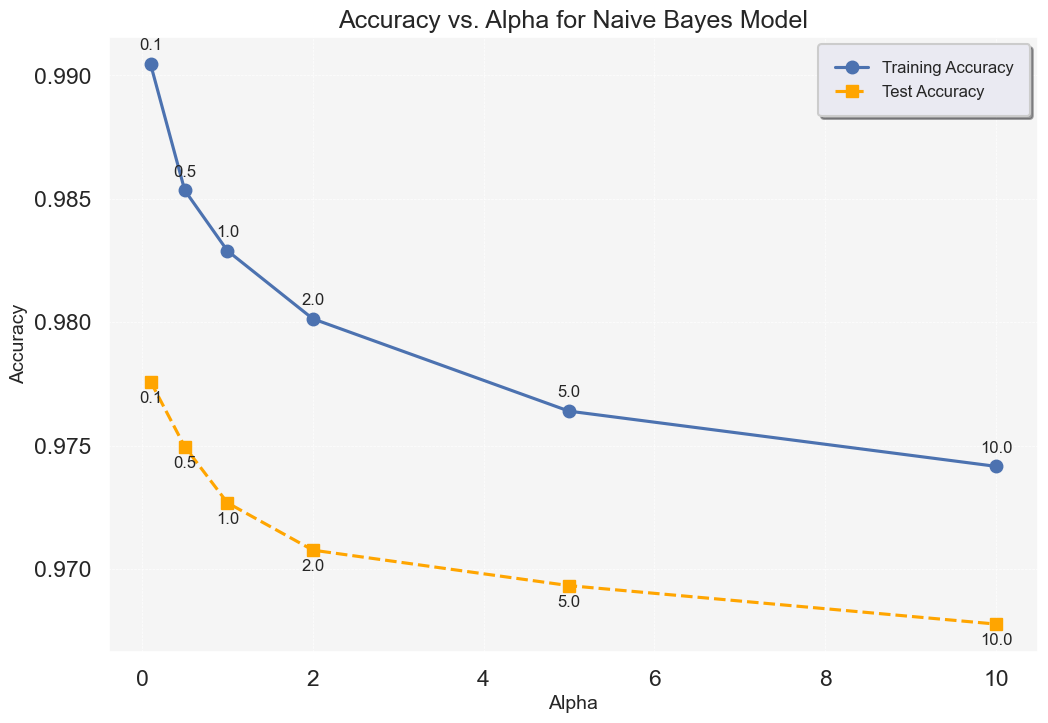

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", context="talk")
plt.figure(figsize=(12, 8))
plt.plot(alpha_values, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='b')
plt.plot(alpha_values, test_accuracies, label='Test Accuracy', marker='s', linestyle='--', color='orange')
plt.title('Accuracy vs. Alpha for Naive Bayes Model', fontsize=18)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='best', fontsize=12, frameon=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.5)
for i, alpha in enumerate(alpha_values):
    plt.annotate(f'{alpha:.1f}', (alpha_values[i], train_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)
    plt.annotate(f'{alpha:.1f}', (alpha_values[i], test_accuracies[i]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=12)
plt.gca().set_facecolor('whitesmoke')
plt.show()

## Analyzing Tuning Score Results

### Effect of Increasing Alpha:

As alpha increases, both training and test accuracies tend to decrease.
The accuracy drop is more pronounced for lower alpha values (e.g., from 0.1 to 1.0) and becomes less significant as alpha continues to increase.
### Overfitting and Underfitting:

 At lower alpha values, the training accuracy is high, indicating the model fits the training data well. However, the test accuracy is slightly lower, suggesting the model might be overfitting.
As alpha increases, the model starts to generalize better to the test data, indicated by the convergence of training and test accuracies. However, after a certain point, both accuracies continue to decrease, which implies that the model is starting to underfit as alpha becomes too high.
### Optimal Alpha Range:

Based on the plot, an alpha value around 1.0 seems to be a good balance between overfitting and underfitting. At this point, the gap between training and test accuracies is minimized, and both are relatively high.

### Small Dataset

Accuracy on training data: 0.9537435255582334
Accuracy on test data: 0.9512282804074296


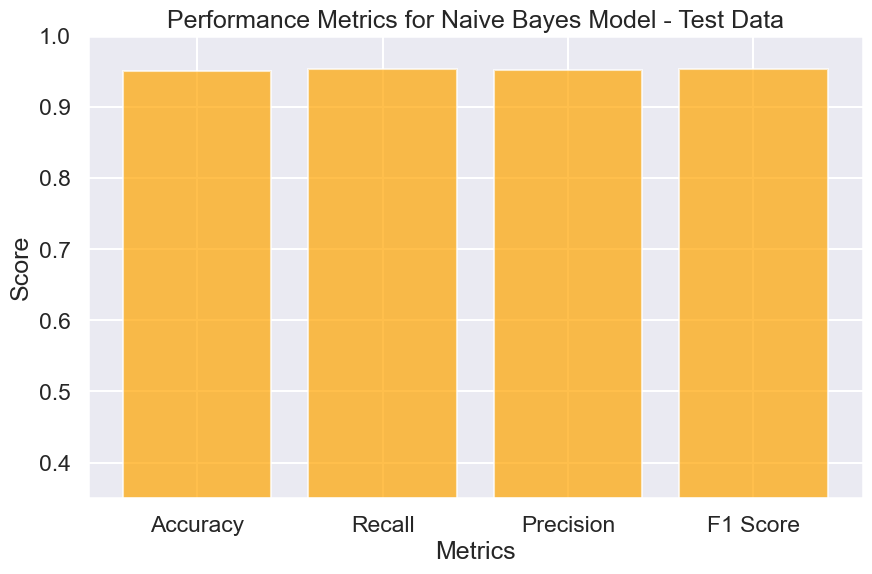

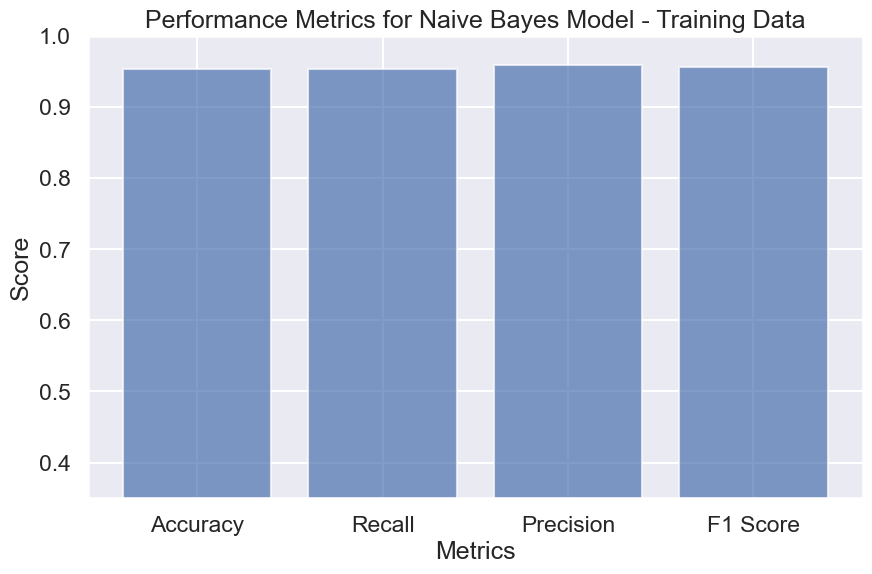

In [37]:
nb_model = MultinomialNB()
nb_model.fit(X_train[:500], Y_train[:500])
prediction_train = nb_model.predict(X_train)
accuracy_train = accuracy_score(Y_train, prediction_train)
precision_train = precision_score(Y_train, prediction_train)
recall_train = recall_score(Y_train, prediction_train)
f1_train = f1_score(Y_train, prediction_train)
train_metrics = [accuracy_train, precision_train, recall_train, f1_train]

print(f"Accuracy on training data: " + str(accuracy_train))

prediction_test = nb_model.predict(X_test)
accuracy_test = accuracy_score(Y_test, prediction_test)
precision_test = precision_score(Y_test, prediction_test)
recall_test = recall_score(Y_test, prediction_test)
f1_test = f1_score(Y_test, prediction_test)
test_metrics = [accuracy_test, precision_test, recall_test, f1_test]

print(f"Accuracy on test data: " + str(accuracy_test))


plt.figure(figsize=(10, 6))
plt.bar(metrics, test_metrics, color='orange', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Model - Test Data')
plt.ylim(0.35, 1)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(metrics, train_metrics, color='b', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics for Naive Bayes Model - Training Data')
plt.ylim(0.35, 1)
plt.show()

--------------------
###  SVC

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

param_grid = {"gamma": [0.1, 1.0, 10, 100]}
svc = SVC()
grid_search = GridSearchCV(SVC(), param_grid, verbose=2)
grid_search.fit(X_train[:500], Y_train[:500])
best_svc = grid_search.best_estimator_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................gamma=0.1; total time=   0.0s
[CV] END ..........................................gamma=0.1; total time=   0.0s
[CV] END ..........................................gamma=0.1; total time=   0.0s
[CV] END ..........................................gamma=0.1; total time=   0.0s
[CV] END ..........................................gamma=0.1; total time=   0.0s
[CV] END ..........................................gamma=1.0; total time=   0.0s
[CV] END ..........................................gamma=1.0; total time=   0.0s
[CV] END ..........................................gamma=1.0; total time=   0.0s
[CV] END ..........................................gamma=1.0; total time=   0.0s
[CV] END ..........................................gamma=1.0; total time=   0.0s
[CV] END ...........................................gamma=10; total time=   0.0s
[CV] END ........................................

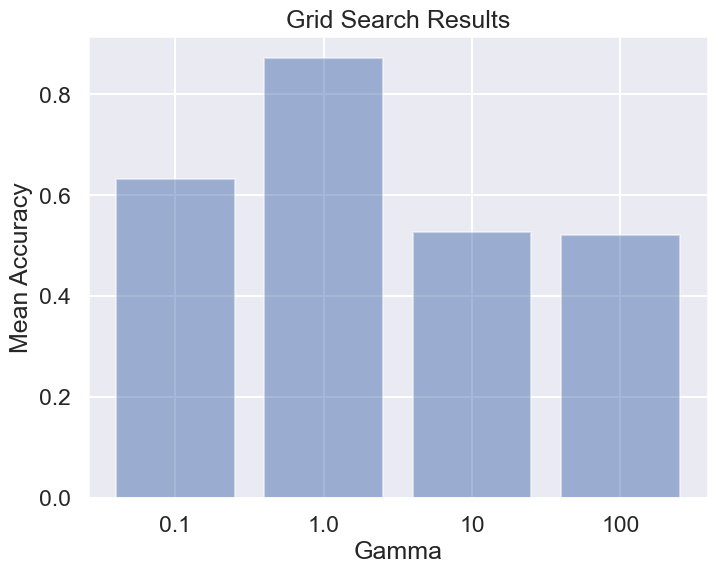

In [22]:
results = grid_search.cv_results_
gammas = param_grid['gamma']
mean_scores = results['mean_test_score']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.arange(len(gammas)), mean_scores, align='center', alpha=0.5)
ax.set_xticks(np.arange(len(gammas)))
ax.set_xticklabels(gammas)
ax.set_xlabel('Gamma')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Grid Search Results')
plt.show()

In [23]:
Y_pred = best_svc.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')


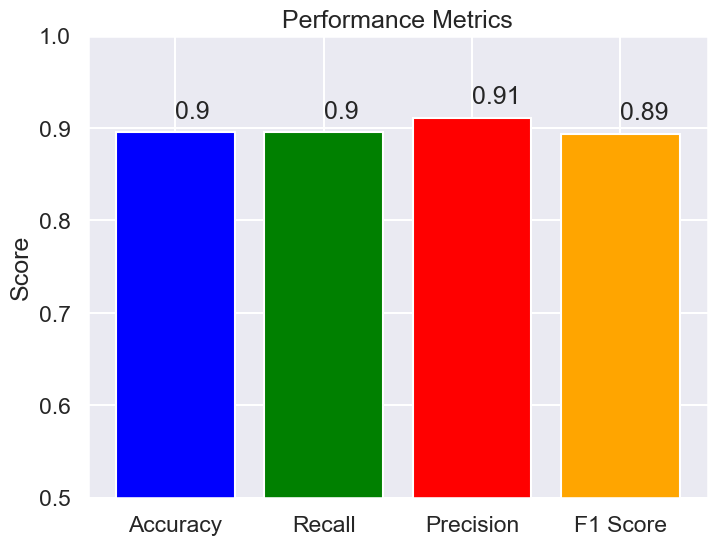

In [24]:

metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
values = [accuracy, recall, precision, f1]

# Plotting the metrics
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])

# Adding labels and title
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_ylim(0.5, 1)  # Set y-axis limit to ensure consistency (0 to 1 for scores)

# Adding text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), va='bottom')

plt.show()


In [25]:
param_grid = {
    "gamma": [0.1, 1.0, 10, 100],
    "C": [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train[:500], Y_train[:500])
best_svc = grid_search.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [26]:
Y_pred = best_svc.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

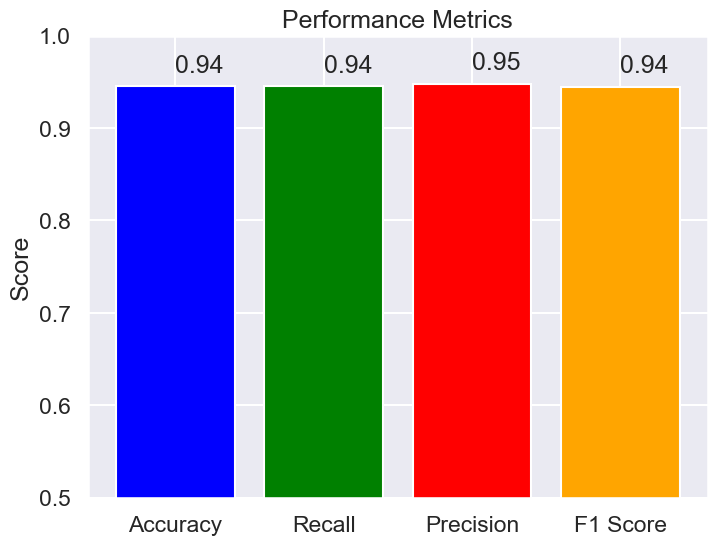

In [27]:

metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
values = [accuracy, recall, precision, f1]

# Plotting the metrics
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])

# Adding labels and title
ax.set_ylabel('Score')
ax.set_title('Performance Metrics')
ax.set_ylim(0.5, 1)  # Set y-axis limit to ensure consistency (0 to 1 for scores)

# Adding text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), va='bottom')

plt.show()

### Conclusion about GridSearch for best SVC param tuning 

* We see performance boost of ~0.05% in all fields just by selecting best SVC classifier with `GridSearchCV()`
* Using a combination of `gamma, C`
* Even though we were using small data set of 500 email samples.

------------------------
### Neural Network


In [28]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train_dense = X_train[:500].toarray()
X_test_dense = X_test.toarray()

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_dense.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dense, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Make predictions
Y_pred = (model.predict(X_test_dense) > 0.5).astype("int32")



O:\Fakultet\III_GODINA\VI_SEMESTAR\RACUNARSKA_INTELIGENCIJA\Projekat\kod\spam-ham-classifier\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 - 5s - 402ms/step - accuracy: 0.6625 - loss: 0.6890 - val_accuracy: 0.9200 - val_loss: 0.6759
Epoch 2/10
13/13 - 3s - 252ms/step - accuracy: 0.9425 - loss: 0.6435 - val_accuracy: 0.9500 - val_loss: 0.6239
Epoch 3/10
13/13 - 3s - 254ms/step - accuracy: 0.9800 - loss: 0.5343 - val_accuracy: 0.9500 - val_loss: 0.5258
Epoch 4/10
13/13 - 3s - 250ms/step - accuracy: 0.9925 - loss: 0.3648 - val_accuracy: 0.9500 - val_loss: 0.3983
Epoch 5/10
13/13 - 3s - 249ms/step - accuracy: 1.0000 - loss: 0.1875 - val_accuracy: 0.9900 - val_loss: 0.2802
Epoch 6/10
13/13 - 3s - 248ms/step - accuracy: 1.0000 - loss: 0.0823 - val_accuracy: 0.9900 - val_loss: 0.2144
Epoch 7/10
13/13 - 3s - 249ms/step - accuracy: 1.0000 - loss: 0.0432 - val_accuracy: 0.9900 - val_loss: 0.1776
Epoch 8/10
13/13 - 3s - 250ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.9900 - val_loss: 0.1571
Epoch 9/10
13/13 - 3s - 250ms/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 0.9900 - val_loss: 0.1425
E

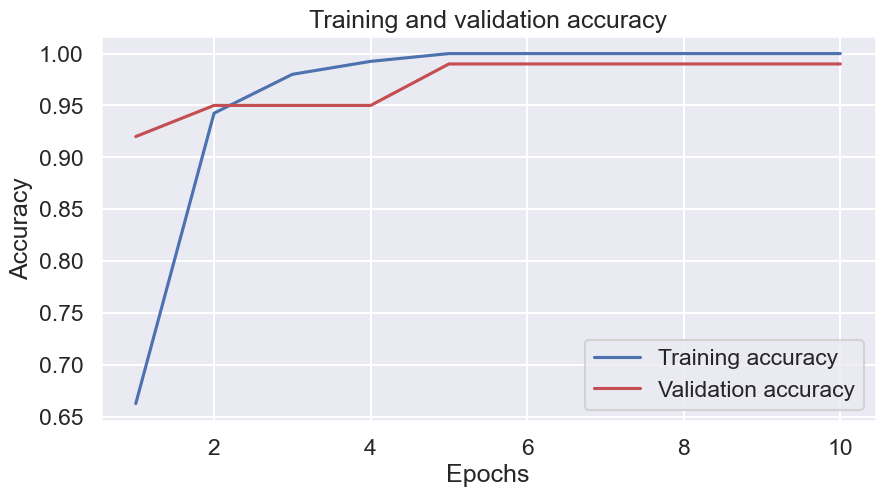

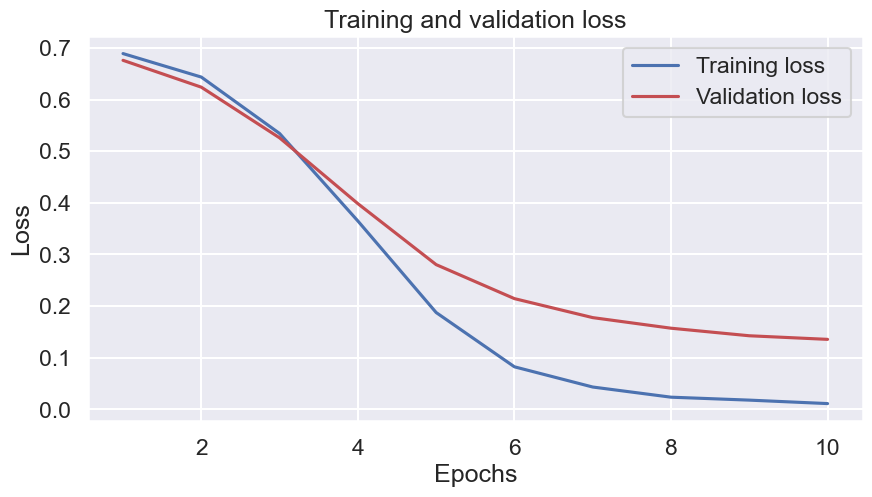

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()